In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import networkx and create a graph instance

In [2]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges to the graph

In [3]:
G.add_node("s", pos=(0,0))
G.add_node("a", pos=(2,2))
G.add_node("b", pos=(2,-2))
G.add_node("t", pos=(4,0))

G.add_edge("s", "a", length=1, time=10)
G.add_edge("s", "b", length=10, time=1)
G.add_edge("a", "t", length=1, time=10)
G.add_edge("s", "t", length=4, time=4)
G.add_edge("b", "t", length=10, time=1)

# Plot the graph

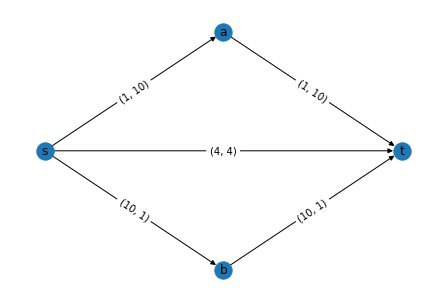

In [4]:
node_pos=nx.get_node_attributes(G,'pos')

edge_labels = {}
for u, v, data in G.edges(data=True):
    edge_labels[u, v] = (data['length'], data['time'])
    
nx.draw(G, node_pos, with_labels=True)
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=edge_labels);

# Shortest path

In [5]:
shortest_path = nx.shortest_path(G, 's', 't', weight='length')
shortest_path_length = nx.shortest_path_length(G, 's', 't', weight='length')

print(f"The shortest path {shortest_path} has a length of {shortest_path_length}.")

The shortest path ['s', 'a', 't'] has a length of 2.


# Quickest path

In [6]:
quickest_path = nx.shortest_path(G, 's', 't', weight='time')
quickest_path_length = nx.shortest_path_length(G, 's', 't', weight='time')

print(f"The quickest path {quickest_path} has a length of {quickest_path_length}.")

The quickest path ['s', 'b', 't'] has a length of 2.


# Weighted sum

In [7]:
weight = 0.5

for u,v in G.edges():
    G[u][v]['preference'] = weight * G[u][v]['length'] + (1 - weight) * G[u][v]['time']

In [8]:
weightedsum_path = nx.shortest_path(G, 's', 't', weight='preference')
weightedsum_path_length = nx.shortest_path_length(G, 's', 't', weight='preference')

print(f"The weighted sum path {weightedsum_path} has a 'length' of {weightedsum_path_length}.")

The weighted sum path ['s', 't'] has a 'length' of 4.0.


# Import osmnx and create a graph instance

In [9]:
import osmnx as ox

G = ox.graph_from_place('Coblenz', 
                        network_type='drive')

In [10]:
ox.plot_graph_folium(G, 
                     tiles='openstreetmap',
                     weight=1)

# Investigate node and edge attributes

In [11]:
G.nodes(data=True)

NodeDataView({163683: {'y': 50.3396318, 'x': 7.5101932, 'street_count': 3}, 20910796: {'y': 50.3629262, 'x': 7.490237, 'highway': 'milestone', 'street_count': 3}, 27352199: {'y': 50.3633973, 'x': 7.5767624, 'street_count': 4}, 27352206: {'y': 50.3631103, 'x': 7.5848583, 'street_count': 3}, 27352207: {'y': 50.3629344, 'x': 7.5854166, 'street_count': 3}, 27352208: {'y': 50.3627763, 'x': 7.5866269, 'street_count': 3}, 27352213: {'y': 50.3614276, 'x': 7.5868925, 'street_count': 3}, 27352229: {'y': 50.3602152, 'x': 7.5908558, 'street_count': 4}, 27352239: {'y': 50.367186, 'x': 7.588022, 'street_count': 3}, 27352241: {'y': 50.3689188, 'x': 7.5877253, 'street_count': 3}, 27352244: {'y': 50.3733076, 'x': 7.5867122, 'street_count': 3}, 27352248: {'y': 50.378069, 'x': 7.5829463, 'street_count': 3}, 27352250: {'y': 50.3816955, 'x': 7.5740942, 'street_count': 3}, 27352256: {'y': 50.3814105, 'x': 7.5755874, 'street_count': 3}, 27352288: {'y': 50.3839143, 'x': 7.5666963, 'street_count': 3}, 27352291

In [12]:
G.edges(data=True)

OutMultiEdgeDataView([(163683, 266696623, {'osmid': [326285632, 390574354, 24526351, 390574375], 'oneway': True, 'lanes': ['3', '2'], 'ref': 'A 61', 'highway': 'motorway', 'maxspeed': '130', 'length': 1003.588, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd9c1d8f8b0>}), (20910796, 316038909, {'osmid': [25819360, 25819361, 198424197, 489943814, 198424199, 603899121], 'oneway': True, 'lanes': ['3', '2'], 'ref': 'A 48', 'highway': 'motorway', 'maxspeed': '130', 'length': 1717.389, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd9c1bffca0>}), (27352199, 31076806, {'osmid': 4832414, 'name': 'Steinstraße', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'length': 82.136}), (27352199, 31076826, {'osmid': 4832824, 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 6.121}), (27352199, 31077556, {'osmid': 215112398, 'oneway': True, 'lanes': '2', 'ref': 'B 49', 'name': 'Schlachthofstraße', '

# Add edge speeds and travel times

In [13]:
ox.add_edge_speeds(G)
ox.add_edge_travel_times(G)

# Calculate the shortest and the quickest paths

In [14]:
start = 469168019
end = 9763293285

shortest_path = ox.shortest_path(G, 
                                 orig=start, 
                                 dest=end, 
                                 weight='length')

quickest_path = ox.shortest_path(G, 
                                 orig=start, 
                                 dest=end, 
                                 weight='travel_time')

In [15]:
ox.plot_route_folium(G, shortest_path, tiles='openstreetmap', color='#FF8000', weight=5)

In [16]:
ox.plot_route_folium(G, quickest_path, tiles='openstreetmap', weight=5)

# Comparison of both routes

In [17]:
shortest_path_length = sum([G[shortest_path[i]][shortest_path[i+1]][0]['length'] for i in range(len(shortest_path) - 1)])
shortest_path_time = sum([G[shortest_path[i]][shortest_path[i+1]][0]['travel_time'] for i in range(len(shortest_path) - 1)])
print(f'The shortest path has a length of {shortest_path_length} and a travel time of {shortest_path_time}.')

The shortest path has a length of 7777.279 and a travel time of 613.9000000000001.


In [18]:
quickest_path_length = sum([G[quickest_path[i]][quickest_path[i+1]][0]['length'] for i in range(len(quickest_path) - 1)])
quickest_path_time = sum([G[quickest_path[i]][quickest_path[i+1]][0]['travel_time'] for i in range(len(quickest_path) - 1)])
print(f'The quickest path has a length of {quickest_path_length} and a travel time of {quickest_path_time}.')

The quickest path has a length of 11102.881999999998 and a travel time of 580.2.


# Weighted sum

In [19]:
weight = 0.5

for i, j in G.edges():
    G[i][j][0]["weighted_sum"] = (weight * G[i][j][0]["length"] 
                              + (1 - weight) * G[i][j][0]["travel_time"])

In [20]:
biobjective_shortest_path = ox.shortest_path(G, 
                                             start, 
                                             end, 
                                             weight='weighted_sum')

In [21]:
ox.plot_route_folium(G, biobjective_shortest_path, tiles='openstreetmap', color='#00FF00', weight=5)